In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)

In [2]:
df = pd.read_csv('../data/processed/train_set.csv')
print(f'Analizando {df.shape[0]} días.')
df.head()

Analizando 511 días.


,instant,fecha,season,anio,mes,holiday,weekday,workingday,clima_cat,temp,atemp,humedad,windspeed,casual,registered,total_rentas,demanda_nivel
0,227,2011-08-15,3,0,8,0,1,1,1,0.665833,0.616167,0.712083,0.208954,775,3563,4338,Media
1,702,2012-12-02,4,1,12,0,0,0,2,0.347500,0.359208,0.823333,0.124379,892,3757,4649,Media
2,371,2012-01-06,1,1,1,0,5,1,1,0.334167,0.340267,0.542083,0.167908,307,3791,4098,Media
3,414,2012-02-18,1,1,2,0,6,0,1,0.346667,0.355425,0.534583,0.190929,1435,2883,4318,Media
4,605,2012-08-27,3,1,8,0,1,1,1,0.703333,0.654688,0.730417,0.128733,989,5928,6917,Alta


In [3]:
features = ['temp','humedad','windspeed','total_rentas']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print('Datos escalados listos para agrupar.')

Datos escalados listos para agrupar.


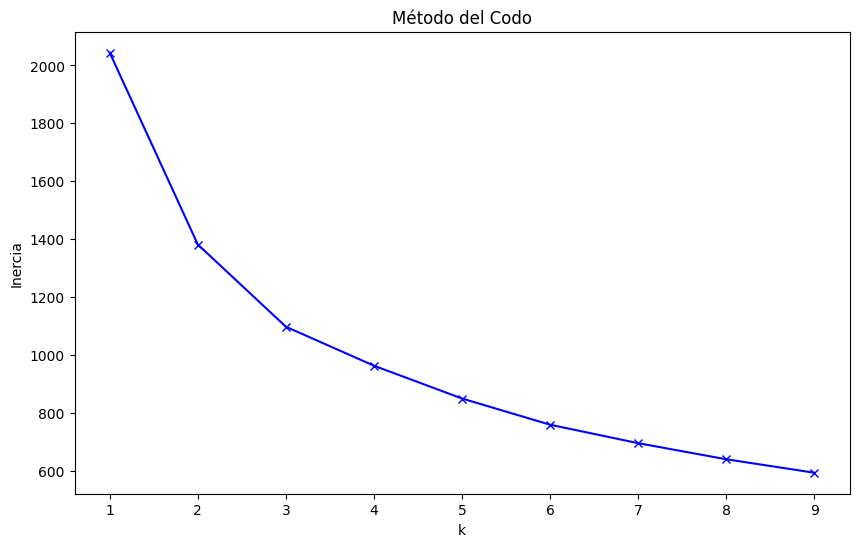

In [4]:
inercias=[]
rango_k=range(1,10)
for k in rango_k:
    km=KMeans(n_clusters=k,random_state=42,n_init=10)
    km.fit(X_scaled)
    inercias.append(km.inertia_)
plt.plot(rango_k,inercias,'bx-')
plt.xlabel('k')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

In [5]:
k_optimo=3
kmeans=KMeans(n_clusters=k_optimo,random_state=42,n_init=10)
df['cluster']=kmeans.fit_predict(X_scaled)
df.head()

,instant,fecha,season,anio,mes,holiday,weekday,workingday,clima_cat,temp,atemp,humedad,windspeed,casual,registered,total_rentas,demanda_nivel,cluster
0,227,2011-08-15,3,0,8,0,1,1,1,0.665833,0.616167,0.712083,0.208954,775,3563,4338,Media,1
1,702,2012-12-02,4,1,12,0,0,0,2,0.347500,0.359208,0.823333,0.124379,892,3757,4649,Media,0
2,371,2012-01-06,1,1,1,0,5,1,1,0.334167,0.340267,0.542083,0.167908,307,3791,4098,Media,2
3,414,2012-02-18,1,1,2,0,6,0,1,0.346667,0.355425,0.534583,0.190929,1435,2883,4318,Media,2
4,605,2012-08-27,3,1,8,0,1,1,1,0.703333,0.654688,0.730417,0.128733,989,5928,6917,Alta,1


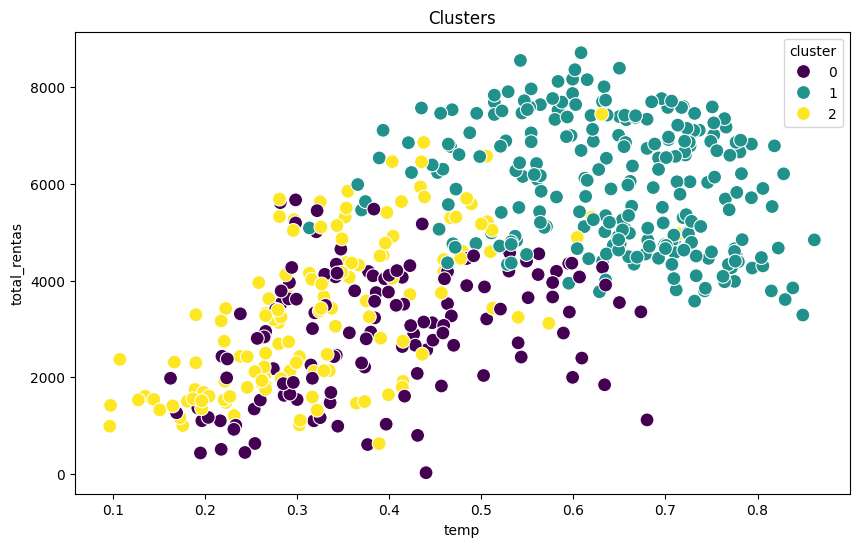

In [6]:
sns.scatterplot(data=df,x='temp',y='total_rentas',hue='cluster',palette='viridis',s=100)
plt.title('Clusters')
plt.show()

In [7]:
perfil=df.groupby('cluster')[features].mean()
perfil['cantidad_dias']=df['cluster'].value_counts()
perfil

,temp,humedad,windspeed,total_rentas,cantidad_dias
cluster,,,,,
0,0.391857,0.761194,0.172734,2956.819549,133
1,0.644055,0.634111,0.162340,5951.033058,242
2,0.332163,0.479649,0.245233,3350.632353,136
